# BuzzFeedNews Facebook Facts

Link: [https://github.com/BuzzFeedNews/2016-10-facebook-fact-check](https://github.com/BuzzFeedNews/2016-10-facebook-fact-check)

This jupyter notebook covers descriptive analysis of **BuzzFeedNews Facebook Facts** dataset. 

## Attributes

* **account_id** - id of account, which posted current post
* **post_id** - id of the post (unique id)
* **Category** - category of the post
    * mainstream
    * right
    * left
* **Page** - page, which posted current post (account_id attribute belongs to this attribute)
* **Post URL** - URL of the post
* **Date Published** - date, when the post was published
* **Post Type** - type of the post
    * link
    * image
    * photo
    * text
* **Rating** - rating, whether is post real or fake
    * mostly true
    * no factual content
    * mixture of true and false
    * mostly false
* **Debate** - whether there was debate
* **share_count** - count of shares of current post
* **reaction_count** - count of reactions of current post
* **comment_count** - count of comments of current post

## Setup and import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
df = pd.read_csv('data/data.csv')

## Analysis

### Count of records

In [3]:
len(df)

2282

### Data examples

In [4]:
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


### More information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
account_id        2282 non-null int64
post_id           2282 non-null int64
Category          2282 non-null object
Page              2282 non-null object
Post URL          2282 non-null object
Date Published    2282 non-null object
Post Type         2282 non-null object
Rating            2282 non-null object
Debate            298 non-null object
share_count       2212 non-null float64
reaction_count    2280 non-null float64
comment_count     2280 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 214.0+ KB


In [6]:
df.describe(include='all')

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
count,2.282000e+03,2.282000e+03,2282,2282,2282,2282,2282,2282,298,2.212000e+03,2280.000000,2280.000000
unique,NaN,NaN,3,9,2282,7,4,4,1,NaN,NaN,NaN
top,NaN,NaN,mainstream,Politico,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-26,link,mostly true,yes,NaN,NaN,NaN
freq,NaN,NaN,1145,536,1,403,1780,1669,298,NaN,NaN,NaN
mean,1.867111e+14,3.299586e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.044816e+03,5364.284649,516.102193
std,1.393826e+14,3.808724e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.983192e+04,19126.544561,3569.355445
min,6.231759e+10,5.510967e+14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,2.000000,0.000000
25%,1.145179e+14,1.247441e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+01,149.000000,37.000000
50%,1.840966e+14,1.290536e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600000e+01,545.500000,131.500000
75%,3.469371e+14,1.540752e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.390000e+02,2416.750000,390.250000


### NaN values

Are there any NaN values in our data?

In [7]:
df.isnull().values.any()

True

Let's look at NaN values per each column:

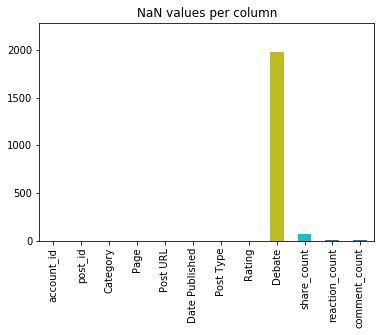

In [8]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(df)), title='NaN values per column')

### Attributes analysis

What is the distribution of fake news labels in our data?

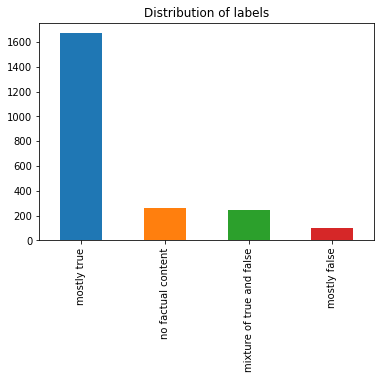

In [10]:
df['Rating'].value_counts().plot(kind='bar', title='Distribution of labels')